In [1]:
import pickle

with open("../model_arthur/data_useable.pickle", "rb") as f:
    train_images, train_labels = pickle.load(f)

In [2]:
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

images_array = np.array(train_images)
labels_array = to_categorical(np.array(train_labels))


X_train, X_val, y_train, y_val = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)

2024-06-06 21:50:41.977909: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Normalization, Flatten
from tensorflow.keras.models import Model

base_model = tf.keras.applications.ResNet50(
  input_shape=(512, 512, 3), 
  include_top=False, 
  weights='imagenet',
  pooling=None,
  classes = 2,
  classifier_activation='softmax'
  )

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1030s 19s/step - accuracy: 0.5994 - loss: 1.6773 - val_accuracy: 0.8325 - val_loss: 0.4054
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 930s 18s/step - accuracy: 0.8223 - loss: 0.3917 - val_accuracy: 0.8350 - val_loss: 0.3349
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1011s 20s/step - accuracy: 0.9008 - loss: 0.2728 - val_accuracy: 0.9475 - val_loss: 0.2034
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3638s 43s/step - accuracy: 0.9336 - loss: 0.1811 - val_accuracy: 0.9625 - val_loss: 0.1333
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1149s 23s/step - accuracy: 0.9660 - loss: 0.1161 - val_accuracy: 0.9125 - val_loss: 0.2100
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1670s 33s/step - accuracy: 0.9822 - loss: 0.0898 - val_accuracy: 0.9975 - val_loss: 0.0606
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1715s 34s/step - accuracy: 0.9901 - loss: 0.0545 - val_accuracy: 0.9925 - val_loss: 0.0364
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2526s 50s/step - accuracy: 0.9957 - loss: 0.0327 - val_accur

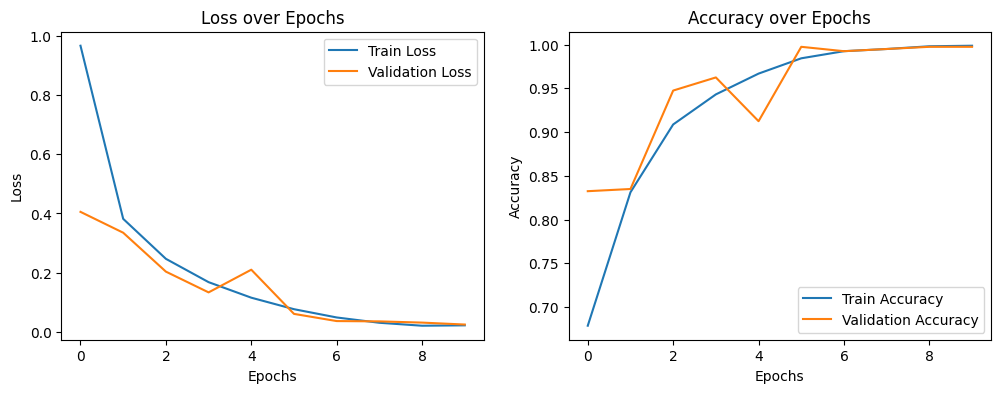

In [6]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [7]:
model.save('../model_arthur/premodel_2.h5')